# Lendo os arquivos

Referência: https://stackoverflow.com/questions/35672809/how-to-read-a-list-of-txt-files-in-a-folder-in-python

In [2]:
#reading files
import glob
txt_files = glob.glob("transcriptions/*.txt") #pegando apenas os arquivos no formato txt dentro da pasta transcriptions.


In [3]:
txt_files #lista com todos os arquivos nas pastas

['transcriptions/F2mp_download_instagram_mp3_320 (transcript).txt',
 'transcriptions/F2mp_download_instagram_mp3_320-10 (transcript).txt',
 'transcriptions/F2mp_download_instagram_mp3_320-11 (transcript).txt',
 'transcriptions/F2mp_download_instagram_mp3_320-2 (transcript).txt',
 'transcriptions/F2mp_download_instagram_mp3_320-3 (transcript).txt',
 'transcriptions/F2mp_download_instagram_mp3_320-4 (transcript).txt',
 'transcriptions/F2mp_download_instagram_mp3_320-5 (transcript).txt',
 'transcriptions/F2mp_download_instagram_mp3_320-6 (transcript).txt',
 'transcriptions/F2mp_download_instagram_mp3_320-7 (transcript).txt',
 'transcriptions/F2mp_download_instagram_mp3_320-8 (transcript).txt',
 'transcriptions/F2mp_download_instagram_mp3_320-9 (transcript).txt']

In [4]:
def read_lines(file):
    """função para ler todos os arquivos. Ela retornar uma tupla: (nome, texto)"""
    with open(file) as file:
        while (line := file.readline().rstrip()):
            data = (file.name, line)
    return data

In [7]:
output_dict = map(read_lines, txt_files) #lendo todos os arquivos com a função

In [8]:
data = list(output_dict) #retirando do mapping e transformando em lista

### Construindo a wordcloud

Referência: https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb

In [9]:
#para importar os dados e organizar.
import pandas as pd
import numpy as np

#para plotar as imagens e ajustar as cores
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [10]:
# lendo os arquivos que foram criados e definindo as colunas
df = pd.DataFrame(data, columns=['file_name', 'text'])

In [11]:
text = ' '.join(df.text.tolist()).lower() #aqui estamos apenas transformando o arquivo em um único texto

In [12]:
stopwords = set(STOPWORDS)

In [13]:
# Palavras que vão ser ignoradas. A lib já traz algumas por padrão, mas são apenas em inglês =[
stopwords.update(["que", "uma", "de", "ou", "o", "na", "um", "e", "é", "não", "mas", "mais", "aqui", "eh", "dos", "lá", "aí", "bem"])

In [16]:
wordcloud = WordCloud(stopwords = stopwords,
                        min_word_length=3, 
                      collocations=True, width=1200, height=600).generate(text)

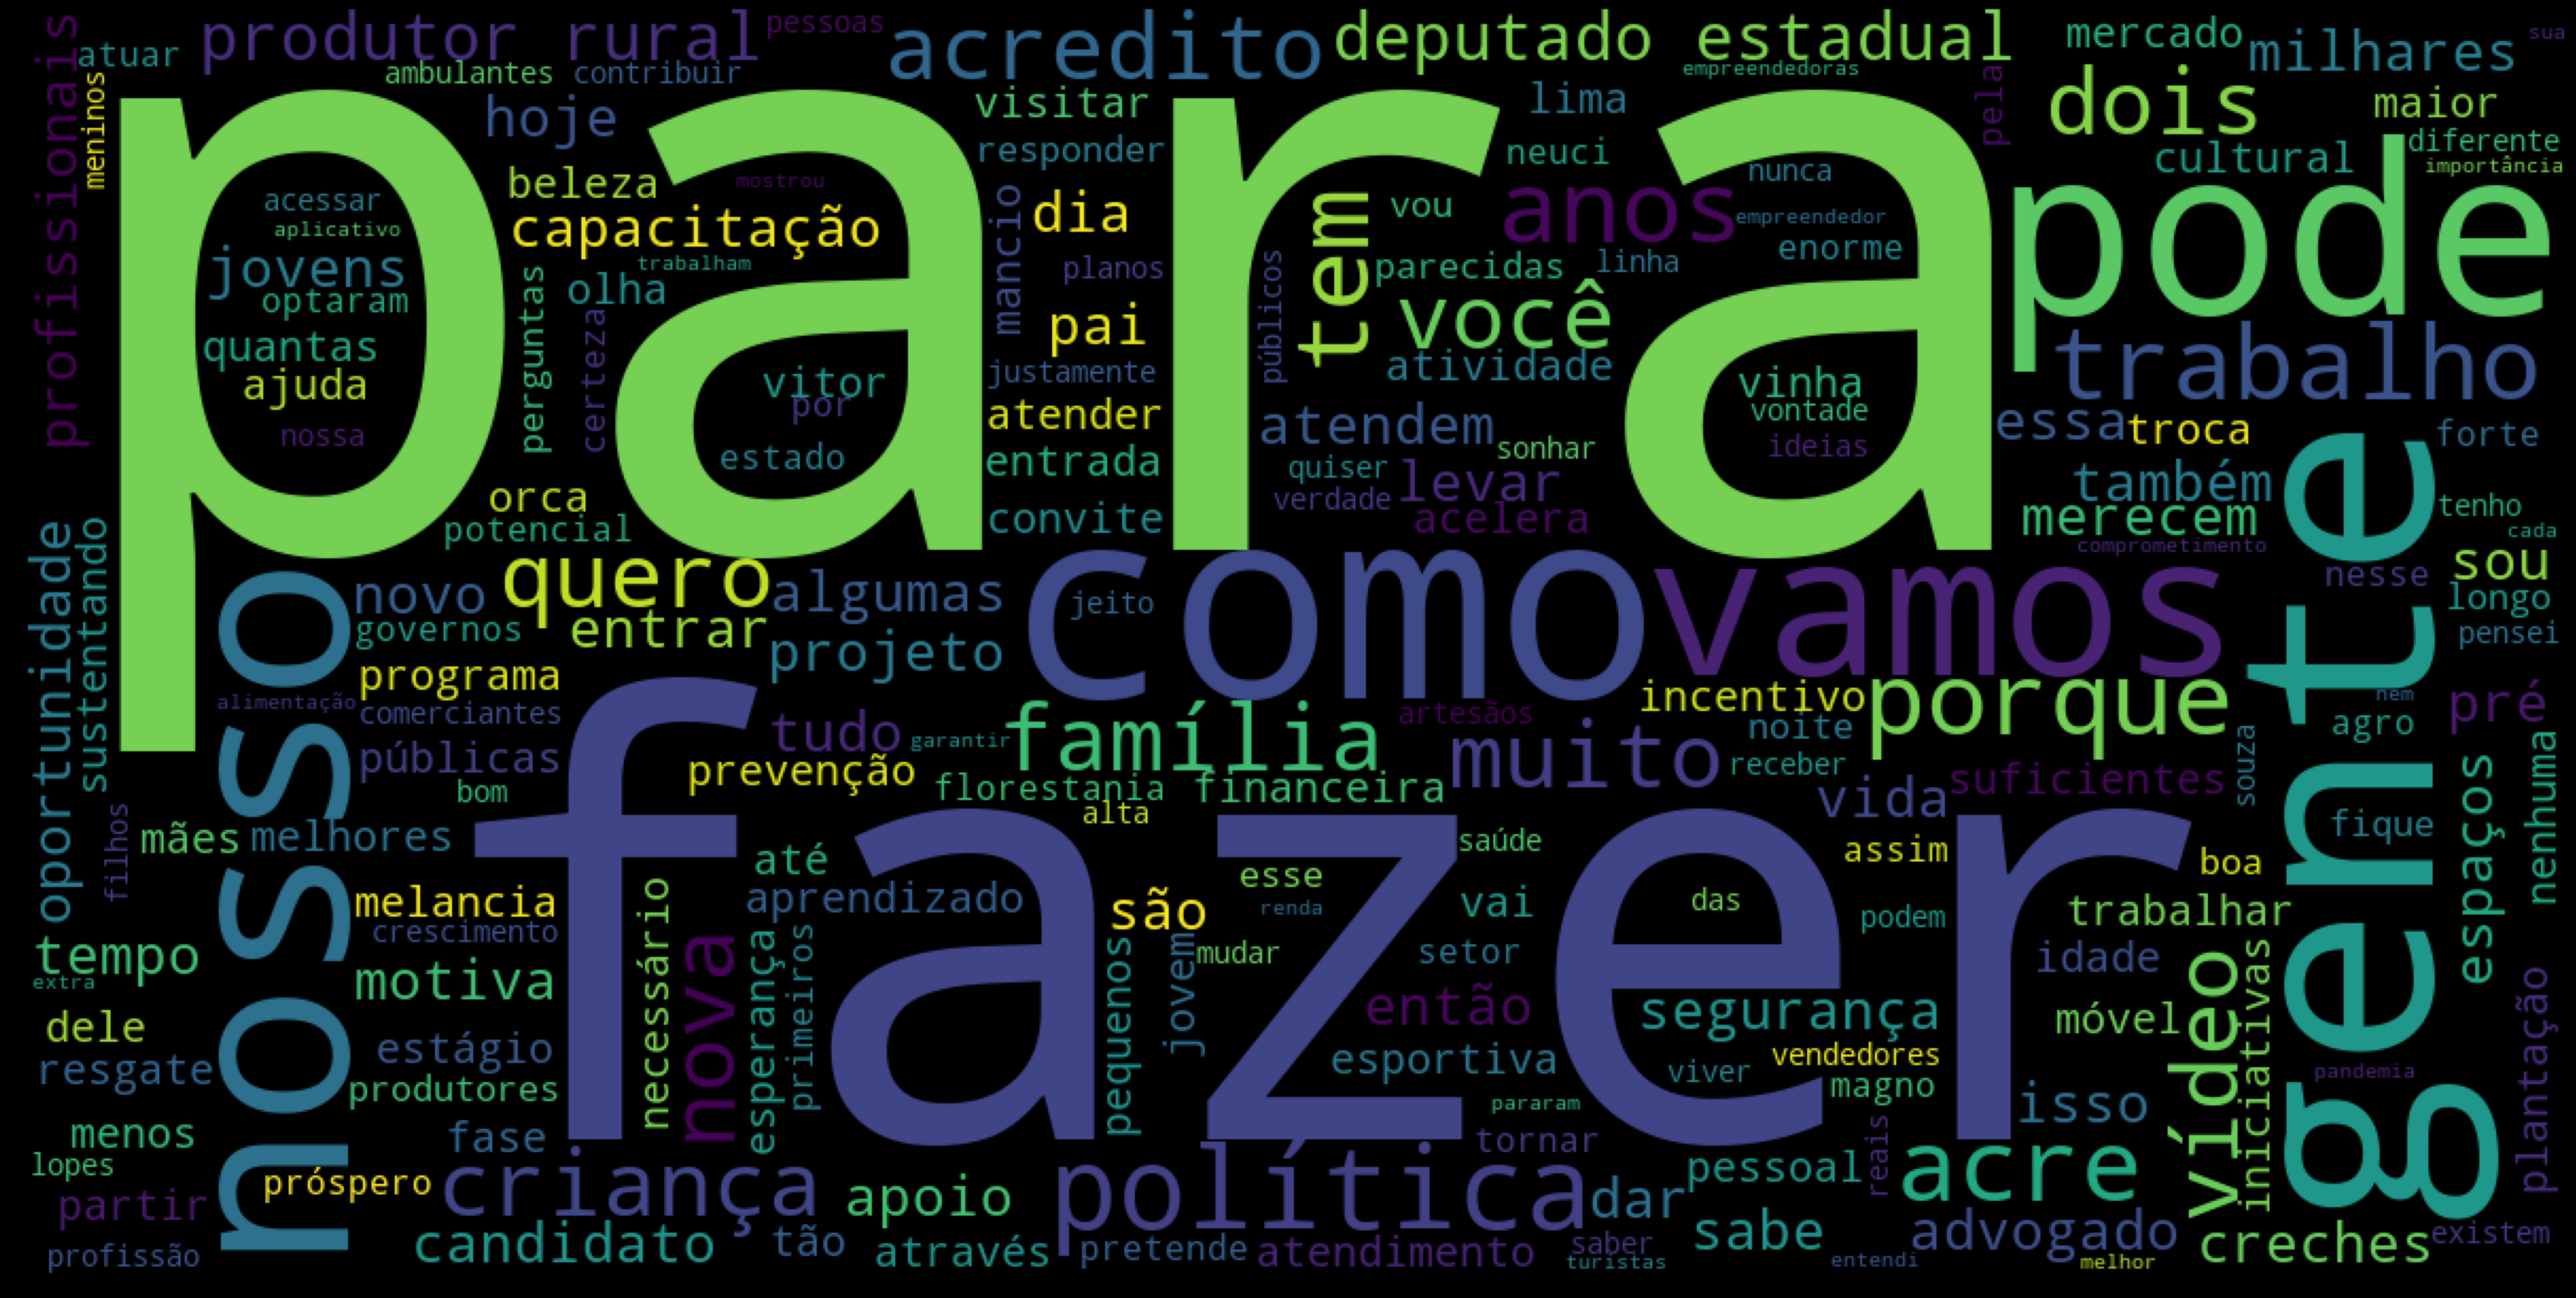

In [17]:
plt.figure( figsize=(70,30), facecolor='k')
plt.imshow(wordcloud)

In [19]:
wordcloud.to_file("wordcloud.png") #salvando o arquivo.

# Plotar as palavras no mapa do Acre

In [21]:
# abrindo a imagem e usando o np.array para transformar a imagem em um array
cand_mask=np.array(Image.open('mapa-acre.jpg'))

# essa linha vai pegar todos os valores maiores do que 3 e transformar eles em 255 (white)
cand_mask=np.where(cand_mask > 3, 255, cand_mask)

In [22]:
#criando a nuvem de palavras
wordcloud = WordCloud(stopwords = stopwords,
                      width=1600, height=800,
                      min_word_length=5,
                      
                      background_color='white',
                      # contour_color='red',
                      mask=cand_mask, 
                      # colormap='Blues',
            ).generate(text)

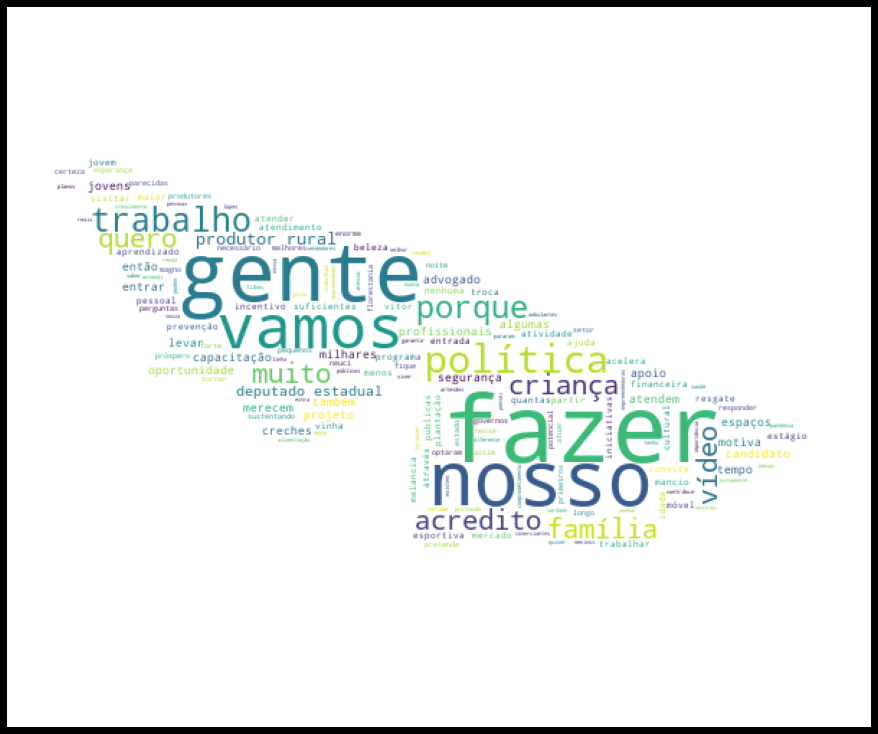

In [23]:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [24]:
wordcloud.to_file("acre.png") #salvando a nova versao